In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%pwd

'/Users/yemao/Documents/Udemy/七月python数据分析入门/第四课 数据获取与处理/lecture_4'

# DataFrame and CSV file

In [4]:
!cat data/data1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [5]:
df = pd.read_csv("data/data1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
df = pd.read_csv("data/data2.csv", names = ['a','b','c','d','msg']) # if the csv file does not have header
df

,a,b,c,d,msg
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
!cat data/csv_mindex.csv
df = pd.read_csv("data/csv_mindex.csv", index_col= ["key1","key2"])
df

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [14]:
list(open('data/data3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [16]:
result =pd.read_table('data/data3.txt', sep = '\s+') # regular expression for multiple spaces between characters
result

/Users/yemao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [17]:
!cat data/data4.csv
pd.read_csv('data/data4.csv', skiprows =[0,2,3])

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [19]:
!cat data/data5.csv
df = pd.read_csv('data/data5.csv')
df
df.isnull()

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [21]:
df = pd.read_csv('data/data6.csv', nrows=5)
df

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [34]:
chunker = pd.read_csv('data/data6.csv', chunksize=100)
chunker

In [35]:
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0) # series element wise add
tot.sort_values(ascending=False)

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
V    328.0
I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
R    318.0
Y    314.0
G    308.0
S    308.0
N    306.0
W    305.0
T    304.0
B    302.0
Z    288.0
C    286.0
4    171.0
6    166.0
7    164.0
8    162.0
3    162.0
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
dtype: float64

In [37]:
data = pd.read_csv('data/data5.csv')
data.head()


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [40]:
data.to_csv('data/out.csv', na_rep='NULL') # Write data
!cat data/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [49]:
data.to_csv(sys.stdout, index=False, header=False) 

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [50]:
data.to_csv(sys.stdout, index=False,  columns = ['a','b','c','d']) # get part of the data

a,b,c,d
1,2,3.0,4
5,6,,8
9,10,11.0,12


In [51]:
dates = pd.date_range('1/1/2000',periods=7)
ts = Series(np.arange(7), index = dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int64

In [52]:
ts.to_csv('data/tseries.csv')
pd.Series.from_csv("data/tseries.csv", parse_dates=True)

/Users/yemao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/Users/yemao/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
dtype: int64

In [54]:
import csv
file = open('data/data7.csv')
csv_reader = csv.reader(file)
for line in csv_reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3', '4']


In [58]:
lines = list(csv.reader(open('data/data7.csv')))
header, body = lines[0], lines[1:]
print(header)
print(body)

['a', 'b', 'c']
[['1', '2', '3'], ['1', '2', '3', '4']]


In [64]:
[v for v in zip(header,zip(*body))]

[('a', ('1', '1')), ('b', ('2', '2')), ('c', ('3', '3'))]

In [65]:
my_dict = {c[0]:c[1]  for c in zip(header,zip(*body)) }
my_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [66]:
my_dict = {c:v for c,v in zip(header,zip(*body)) }
my_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [69]:
pd.DataFrame(my_dict,columns = ['a','b','c'])

,a,b,c
0,1,2,3
1,1,2,3


In [102]:
obj = \
"""
[{"Name": "Zhang",
 "Hobies": ["Reading", "Basketball", "Writing blogs"],
 "Pet": null,
 "Siblings": [{"Name": "Jason", "Age": 25, "Pet": "Dog"},
              {"Name": "Lucy", "Age": 21, "Pet": "äää"}]
}]
"""

In [103]:
import json
dict_result = json.loads(obj)  # loads(str): from string to python built-in object
type(dict_result)
print(dict_result)

[{'Name': 'Zhang', 'Hobies': ['Reading', 'Basketball', 'Writing blogs'], 'Pet': None, 'Siblings': [{'Name': 'Jason', 'Age': 25, 'Pet': 'Dog'}, {'Name': 'Lucy', 'Age': 21, 'Pet': 'äää'}]}]


In [104]:
mystr = json.dumps(dict_result, ensure_ascii=False).encode('utf8')  # dumps(dict): from object to string
mystr

b'[{"Name": "Zhang", "Hobies": ["Reading", "Basketball", "Writing blogs"], "Pet": null, "Siblings": [{"Name": "Jason", "Age": 25, "Pet": "Dog"}, {"Name": "Lucy", "Age": 21, "Pet": "\xc3\xa4\xc3\xa4\xc3\xa4"}]}]'

In [105]:
mystr.decode()

'[{"Name": "Zhang", "Hobies": ["Reading", "Basketball", "Writing blogs"], "Pet": null, "Siblings": [{"Name": "Jason", "Age": 25, "Pet": "Dog"}, {"Name": "Lucy", "Age": 21, "Pet": "äää"}]}]'

In [106]:
with open('data/myfile.json','w', encoding='utf8') as json_file: # using dump(dict) to write to file, from obj to str 
    json.dump(dict_result, json_file, ensure_ascii=False)

In [107]:
with open('data/myfile.json', 'r') as f: # using load() to read from a file, from str to obj
    dict_result = json.load(f)
    print(dict_result)

[{'Name': 'Zhang', 'Hobies': ['Reading', 'Basketball', 'Writing blogs'], 'Pet': None, 'Siblings': [{'Name': 'Jason', 'Age': 25, 'Pet': 'Dog'}, {'Name': 'Lucy', 'Age': 21, 'Pet': 'äää'}]}]


In [108]:
dict_result[0]['Siblings']

[{'Name': 'Jason', 'Age': 25, 'Pet': 'Dog'},
 {'Name': 'Lucy', 'Age': 21, 'Pet': 'äää'}]

In [111]:
pd.DataFrame(dict_result[0]['Siblings'], columns=['Age','Name', 'Pet'])

,Age,Name,Pet
0,25,Jason,Dog
1,21,Lucy,äää


In [113]:
from lxml.html import parse
from urllib.request import urlopen

parsed = parse(urlopen('https://ask.julyedu.com/'))

doc = parsed.getroot()

In [114]:
doc

<Element html at 0x11a4bfbd8>

In [115]:
links = doc.findall('.//a')
links[15:20]

[<Element a at 0x11a4d0318>,
 <Element a at 0x11a4d0368>,
 <Element a at 0x11a4d03b8>,
 <Element a at 0x11a4d0408>,
 <Element a at 0x11a4d0458>]

In [116]:
lnk = links[14]
lnk.get('href')
print(lnk.text_content())

面试题库


In [117]:
urls = [lnk.get('href') for lnk in doc.findall('.//a')]
urls[-10:]

['https://www.epubit.com',
 'https://www.julyedu.com',
 'https://www.julyedu.com/help/index/about',
 'https://www.julyedu.com/help/index/join',
 'http://weibo.com/askjulyedu',
 'javascript:',
 'https://tianchi.aliyun.com',
 'https://cloud.tencent.com/developer/edu',
 'https://www.aidaxue.com/?ch=qyzx',
 'https://www.epubit.com']

# Websraping

In [122]:
import sys
import pyperclip
import requests

In [123]:
res = requests.get("https://automatetheboringstuff.com/files/rj.txt")

In [124]:
res.raise_for_status()

In [125]:
playfile = open("data/romeoandjuliet.txt","wb")
count_of_chunk = 0
for chunk in res.iter_content(10000):
    count_of_chunk +=1
    bytes_written = playfile.write(chunk)

bytes_written

8978

In [126]:
count_of_chunk

18

In [127]:
playfile.close()
print("type of response", type(res))

type of response <class 'requests.models.Response'>


In [128]:
res.status_code

200

In [129]:
if res.status_code == requests.codes.ok:
    print("the status code means ok")

the status code means ok


In [130]:
res.text

'The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org/license\r\n\r\n\r\nTitle: Romeo and Juliet\r\n\r\nAuthor: William Shakespeare\r\n\r\nPosting Date: May 25, 2012 [EBook #1112]\r\nRelease Date: November, 1997  [Etext #1112]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n*Project Gutenberg is proud to cooperate with The World Library*\r\nin the presentation of The Complete Works of William Shakespeare\r\nfor your reading for education and entertainment.  HOWEVER, THIS\r\nIS NEITHER SHAREWARE NOR PUBLIC DOMAIN. . .AND UNDER THE LIBRARY\r\nOF THE FUTURE CONDITIONS OF THIS PRESENTATION. . .NO CHARGES MA

In [131]:
len(res.text)

178978

In [132]:
import bs4

In [155]:
try:
    res = requests.get("https://nostarch.com")
    res.raise_for_status()
    nostartsoup = bs4.BeautifulSoup(res.text,'html.parser')
    print("type of bs4 object:", type(nostartsoup))
    
    local_html_file = open("data/example.html")
    local_soup = bs4.BeautifulSoup(local_html_file.read(),"html.parser")
    list_of_tags = local_soup.select("#author")
    
    print("first content in the tag:", str(list_of_tags[0]))
    print("text content:", list_of_tags[0].get_text())
    print("element name:", list_of_tags[0].name)
    print("attributes dictionary with attributes and values:", list_of_tags[0].attrs)
    print("first way to get attributes value:", list_of_tags[0].get("id"))
    print("second way to get attributes value:", list_of_tags[0].attrs["id"])
    print("third way to get attributes value:", list_of_tags[0]["id"])
    print("Fourth way to get attributes value:", local_soup.find("span")["id"])
    
    p_elements = local_soup.select("p")
    print("p elements:\n", p_elements)
    
    listofClassTags = local_soup.select(".slogan")
    print("class of slogan:", str(listofClassTags[0]))
    
    listOfPTagDirectionUnderDiv = local_soup.select("div > p")
    print("p elements directly under div:", str(listOfPTagDirectionUnderDiv[0]), " length:", len(listOfPTagDirectionUnderDiv))
    
except Exception as err:
    print("there is a problem in bs4 exercise：%s" % err)

type of bs4 object: <class 'bs4.BeautifulSoup'>
first content in the tag: <span id="author">Al Sweigart</span>
text content: Al Sweigart
element name: span
attributes dictionary with attributes and values: {'id': 'author'}
first way to get attributes value: author
second way to get attributes value: author
third way to get attributes value: author
Fourth way to get attributes value: author
p elements:
 [<p>Test</p>, <p>Download my <strong>Python</strong> book from <a href="http://inventwithpython.com">my website</a>.</p>, <p class="slogan">Learn Python the easy way!</p>, <p>By <span id="author">Al Sweigart</span></p>]
class of slogan: <p class="slogan">Learn Python the easy way!</p>
p elements directly under div: <p>Download my <strong>Python</strong> book from <a href="http://inventwithpython.com">my website</a>.</p>  length: 3


In [187]:
import requests
import bs4
from csv import DictWriter 
from csv import writer
try:
    res = requests.get("https://www.rithmschool.com/blog")
    res.raise_for_status()
    
    article_data = []
    
    rithmschool_soup = bs4.BeautifulSoup(res.text, "html.parser") # 
    list_of_articles = rithmschool_soup.find_all("article")
    with open("data/webscraping_rithmschool.csv",'w') as filehandler:
        mywriter = DictWriter(filehandler,fieldnames = ("Title","Link","Date"))
        mywriter.writeheader()
        
        for article in list_of_articles:
            a_tag = article.find("a")
            title = a_tag.get_text()
            link ="https://www.rithmschool.com" + a_tag.attrs["href"]
            date = article.select("h4>small")[0].get_text()
            #print(title,link,date)
            mywriter.writerow({"Title":title,
                              "Link":link,
                              "Date":date})
            article_data.append([title, link, date])
            
            
    with open("data/webscraping_rithmschool2.csv",'w') as filehandler:
        ordinary_writer = writer(filehandler)
        ordinary_writer.writerow(['Title','Link','Date'])
        for article in article_data:
            ordinary_writer.writerow(article)
except Exception as err:
    print("error:", err)

In [188]:
data = pd.read_csv('data/webscraping_rithmschool.csv',parse_dates = ['Date'], index_col = 'Date')
data.head()

,Title,Link
Date,,
2020-04-29,Student Interview: R14 On Remote Company Projects,https://www.rithmschool.com/blog/student-inter...
2020-04-21,7 Easy Ways To Focus On The Job Search Process,https://www.rithmschool.com/blog/focus-job-pro...
2020-04-08,SanFranciscoBootcamps.com - Campus Review – Ri...,https://www.rithmschool.com/blog/san-francisco...
2020-04-01,Rithm School Remote Learning FAQs,https://www.rithmschool.com/blog/remote-learni...
2020-03-31,Looking Back On Our First Women In Tech Event ...,https://www.rithmschool.com/blog/looking-back-...


In [189]:
data2 = pd.read_csv('data/webscraping_rithmschool2.csv',parse_dates = ['Date'], index_col = 'Date')
data2.head()

,Title,Link
Date,,
2020-04-29,Student Interview: R14 On Remote Company Projects,https://www.rithmschool.com/blog/student-inter...
2020-04-21,7 Easy Ways To Focus On The Job Search Process,https://www.rithmschool.com/blog/focus-job-pro...
2020-04-08,SanFranciscoBootcamps.com - Campus Review – Ri...,https://www.rithmschool.com/blog/san-francisco...
2020-04-01,Rithm School Remote Learning FAQs,https://www.rithmschool.com/blog/remote-learni...
2020-03-31,Looking Back On Our First Women In Tech Event ...,https://www.rithmschool.com/blog/looking-back-...


In [195]:
from csv import reader
data = []
with open("data/webscraping_rithmschool2.csv") as filehandle:
    csv_rows = reader(filehandle)
    table_header = next(csv_rows) # or list(csv_rows)
    
    for row in csv_rows:
        title, link, date = row[0], row[1], row[2]
        data.append((title,link,date))
        
pd.DataFrame(data, columns = ['Title','Link','Date']).set_index("Date").head()

,Title,Link
Date,,
"April 29, 2020",Student Interview: R14 On Remote Company Projects,https://www.rithmschool.com/blog/student-inter...
"April 21, 2020",7 Easy Ways To Focus On The Job Search Process,https://www.rithmschool.com/blog/focus-job-pro...
"April 08, 2020",SanFranciscoBootcamps.com - Campus Review – Ri...,https://www.rithmschool.com/blog/san-francisco...
"April 01, 2020",Rithm School Remote Learning FAQs,https://www.rithmschool.com/blog/remote-learni...
"March 31, 2020",Looking Back On Our First Women In Tech Event ...,https://www.rithmschool.com/blog/looking-back-...


In [196]:
!head -21 data/Performance_MNR.xml

In [197]:
from lxml import objectify

In [201]:
path = "data/Performance_MNR.xml"
parsed = objectify.parse(open(path))
root = parsed.getroot()

<Element PERFORMANCE at 0x11dbf42c8>

In [203]:
data = []
skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']
for element in root.INDICATOR:
    el_data = {}
    for child in element.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [204]:
df = pd.DataFrame(data)
df

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95
5,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,94.4,95,6,2008,96.2,95
6,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96,95,7,2008,96.2,95
7,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.4,95,8,2008,96.2,95
8,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,93.7,95,9,2008,95.9,95
9,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.4,95,10,2008,96,95


In [206]:
frame = pd.read_csv('data/data1.csv')
frame
frame.to_pickle("data/frame_pickle") # binary file

In [208]:
pd.read_pickle("data/frame_pickle")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [209]:
store = pd.HDFStore("data/mydata.h5")
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: data/mydata.h5

In [217]:
for obj in store.groups():
    print(obj)

/obj1 (Group) ''
/obj1_col (Group) ''


In [218]:
store['obj1']

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [219]:
store['obj1_col']

0    1
1    5
2    9
Name: a, dtype: int64

In [220]:
store.close()
os.remove('data/mydata.h5')

In [356]:
from bs4 import BeautifulSoup
result = requests.get("http://www.chalmers.se")
print(result.encoding)
content = result.content
soup = BeautifulSoup(content, from_encoding=result.encoding)
samples= soup.find_all("a",class_="item")# a tag but with class = item
samples[0]

utf-8


<a class="item" href="https://www.chalmers.se/sv/institutioner/e2/nyheter/Sidor/Tankestyrda-armproteser-med-kansel-nu-en-del-av-vardagen.aspx">
<div class="left-col">
<div class="img-container" style="background-image: url('/SiteCollectionImages/Institutioner/E2/Nyheter/Tankestyrda%20armproteser%20med%20k%c3%a4nsel%20har%20blivit%20en%20del%20av%20vardagen/tankestyrd_protes_80px.jpg');"></div>
</div>
<div class="right-col">
<div class="frontpageTitle">
                            Tankestyrda armproteser med känsel – nu i vardagen
                        </div>
<div class="meta">
<i class="material-icons"></i> Publicerad on 29 apr 2020
                        </div>
</div>
</a>

In [357]:
samples= soup.find_all(valign = "top")# locate an element which has an atrribute with top as a value
samples[0]

<td class="s4-wpcell-plain" id="MSOZoneCell_WebPartctl00_m_g_90e14af7_f0b6_4b60_86c3_0df0fd2383cf" valign="top"><table border="0" cellpadding="0" cellspacing="0" class="s4-wpTopTable" width="100%">
<tr>
<td valign="top"><div allowdelete="false" allowexport="false" class="ms-WPBody" haspers="false" id="WebPartctl00_m_g_90e14af7_f0b6_4b60_86c3_0df0fd2383cf" style="" webpartid="90e14af7-f0b6-4b60-86c3-0df0fd2383cf" width="100%"><div id="ctl00_m_g_90e14af7_f0b6_4b60_86c3_0df0fd2383cf">
<div class="image-frontpage w0">
<div class="image" id="ctl00_m_g_90e14af7_f0b6_4b60_86c3_0df0fd2383cf_ctl00_ImageAnchorPanel">
<div class="image-wrapper" style="position: relative;">
<a href="/sv/nyheter/info/Sidor/default.aspx">
<img alt="coronavirus." class="img-responsive" src="/SiteCollectionImages/Startsida/Coronarelaterat/Chalmers_Covid19_360x220px_left.jpg"/>
<div class="header-text">
                    Utbrottet av coronavirus
                    <div class="body-text">Chalmers samlade information 

In [361]:
samples = soup.find_all(href = re.compile("nyheter"),class_="item") 
samples[0]

<a class="item" href="https://www.chalmers.se/sv/institutioner/e2/nyheter/Sidor/Tankestyrda-armproteser-med-kansel-nu-en-del-av-vardagen.aspx">
<div class="left-col">
<div class="img-container" style="background-image: url('/SiteCollectionImages/Institutioner/E2/Nyheter/Tankestyrda%20armproteser%20med%20k%c3%a4nsel%20har%20blivit%20en%20del%20av%20vardagen/tankestyrd_protes_80px.jpg');"></div>
</div>
<div class="right-col">
<div class="frontpageTitle">
                            Tankestyrda armproteser med känsel – nu i vardagen
                        </div>
<div class="meta">
<i class="material-icons"></i> Publicerad on 29 apr 2020
                        </div>
</div>
</a>

In [383]:
import re
import urllib.request
import ssl

#user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36"
link= "https://digital.nok.se/web/site-711316/state-jurdcojtgarcytzr/page-711487"
headers = {'User-Agent': user_agent,
           "referer": "https://digital.nok.se/web/site-711316/state-jurdcojtgarcytzr/page-711487",
          "cookie": "_ga=GA1.2.174228092.1588112887; _fbp=fb.1.1588112887487.1603513323; COOKIE_SUPPORT=true; GUEST_LANGUAGE_ID=en_US; JSESSIONID=CB2ECB18905C188209821AD513229DFF; _gid=GA1.2.97699040.1588430479; LFR_SESSION_STATE_20120=1588430479055; LFR_SESSION_STATE_4023350=1588433383716"
          }


request = urllib.request.Request(url=link, headers=headers)
#gcontext = ssl.SSLContext() # bypass “SSL: CERTIFICATE_VERIFY_FAILED” Error
html = urllib.request.urlopen(request,context=gcontext).read()

nok_soup = BeautifulSoup(html,"html.parser")
nok_soup

<!DOCTYPE html>
 <html class="ltr cloubi-frame page-level-3" dir="ltr" lang="en-US"> <head> <title>Rivstart B1+B2</title> <meta content="initial-scale=1.0, width=device-width" name="viewport"/> <meta content="notranslate" name="google"/> <link href="https://fonts.googleapis.com/css?family=Source+Sans+Pro:400,400i,600,600i,700,700i" rel="stylesheet"/> <link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.5.0/css/font-awesome.min.css" rel="stylesheet"/> <link href="https://digital.nok.se/o/navigationmodel-hierarchical-theme/css/animation/animate.min.css" rel="stylesheet" type="text/css"/> <link href="https://digital.nok.se/o/navigationmodel-hierarchical-theme/css/animation/magic.min.css" rel="stylesheet" type="text/css"/> <script src="https://digital.nok.se/o/navigationmodel-hierarchical-theme/js/lib/bounce.min.js" type="text/javascript"></script> <link href="https://digital.nok.se/o/dynamic-data-mapping-form-renderer/css/main.css" rel="stylesheet" type="text/css"> <meta content="te

In [387]:
for ele in nok_soup.find_all("source", id = re.compile(r"audio-source$")):
    print(ele["src"])

/o/blob-download?blob=YmxvYi02cXU5aVc4VnlWV0FPNUpOOEJaTFoxOWRCWVc3THlqcm5ESXhMYXBTdnBrPS01OGRiYy1ZWFZrYVc4dmJYQmxadz09&token=TWr5Ta4vWAyzkRHyXbxXH_hnyZEOvwbFP4CFe26D_sE*
/o/blob-download?blob=YmxvYi1FMGtfRm1XOVVjV0xreGU0c1A0RFVoRDlxVk4reG1FZ24rS0pnbExUd1A4PS1iNTllNC1ZWFZrYVc4dmJYQmxadz09&token=mtkEF1LBJCcgh4_TN5-rspKKDBupHl0xD8zqVNkBSpE*
/o/blob-download?blob=YmxvYi1OSGdmdlhvNF9NRWx5ZzhoakxJVGw4NkdCanNxRE10cTd1OW5SSnNvTExvPS1hNGJlMy1ZWFZrYVc4dmJYQmxadz09&token=rw2eEVaEI3FY9SyHCOizo4LsCbJsz-9YnyKjIOVZ1SE*
/o/blob-download?blob=YmxvYi1GNmNGbHdDejExdzlkQWdRVE5yelZSVVVrdm5CTDArRmQ3eTlEbEtsN29RPS0xNzcxOWItWVhWa2FXOHZiWEJsWnc9PQ**&token=X7v7kFJhYBhxQ3tLrjkSHH7OoNEc6IjZjoXbAQSn6wM*
/o/blob-download?blob=YmxvYi1jTWRCRlRpemtzblg4NG5RcEtFSGpiT1V4WmtMVG92T2RIcEcraHBod01JPS1jMjFkYi1ZWFZrYVc4dmJYQmxadz09&token=NvW2H-MmGrIDemINCHAEEGbpgZwI3yHT5npIYAg19EU*
/o/blob-download?blob=YmxvYi1FOTBoV2NPRm5XOXlHYTZzT2ZpRUlEMkVaaW5fUXJnbk5RZEpmTnVteGdRPS1kZWRiNC1ZWFZrYVc4dmJYQmxadz09&token=keSaZP8YJG-qO9B5Q9Yem

In [388]:
payload = {'wd': 'python', 'rn': '10'}
r = requests.get("http://www.baidu.com/s", params=payload)
print(r.url)

https://wappass.baidu.com/static/captcha/tuxing.html?&ak=c27bbc89afca0463650ac9bde68ebe06&backurl=https%3A%2F%2Fwww.baidu.com%2Fs%3Fwd%3Dpython%26rn%3D10&logid=8352454062316421864&signature=b6e54c63a5ae5e7b277cb0ce1b1a47f1&timestamp=1588442240


In [389]:
import requests
import time
from bs4 import BeautifulSoup

#设置列表页URL的固定部分
url='http://bj.lianjia.com/ershoufang/'
#设置页面页的可变部分
page=('pg')

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
'Accept':'text/html;q=0.9,*/*;q=0.8',
'Accept-Charset':'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
'Accept-Encoding':'gzip',
'Connection':'close',
'Referer':'http://www.baidu.com/link?url=_andhfsjjjKRgEWkj7i9cFmYYGsisrnm2A-TN3XZDQXxvGsM9k9ZZSnikW2Yds4s&amp;amp;wd=&amp;amp;eqid=c3435a7d00146bd600000003582bfd1f'
}

b'<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta http-equiv="Content-language" content="zh-CN" /><meta name="format-detection" content="telephone=no" /><meta name="applicable-device" content="pc"><meta name="location" content="province=\xe5\x8c\x97\xe4\xba\xac;city=\xe5\x8c\x97\xe4\xba\xac;coord=39.8992,116.4138" /><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/bj/ershoufang/pg1/" >\n<meta name="mobile-agent" content="format=html5;url=https://m.lianjia.com/bj/ershoufang/pg1/"><script>\nljConf = {\n    city_id: \'110000\',\n    city_abbr: \'bj\',\n    city_name: \'\xe5\x8c\x97\xe4\xba\xac\',\n    channel: \'ershoufang\',\n    page: \'ershoufang_search\',\n    pageConfig: {"ajaxroot":"https:\\/\\/ajax.api.lianjia.com\\/","im
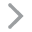
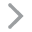
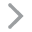
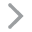

In [390]:
for i in range(1,3): # from page 1 to page 2
     if i == 1:
          i=str(i)
          a=(url+page+i+'/')
          r=requests.get(url=a,headers=headers)
          html=r.content
     else:
          i=str(i)
          a=(url+page+i+'/')
          r=requests.get(url=a,headers=headers)
          html2=r.content
          html = html + html2
     #每次间隔2秒
     time.sleep(2)
html

In [391]:
lj=BeautifulSoup(html,'html.parser')

In [411]:
price=lj.find_all('div','priceInfo')
tp=[]
for a in price:
    tp.append(a.span.get_text())
    
print(len(tp))

60


In [412]:
houseInfo=lj.find_all('div',attrs={'class':'houseInfo'})
hi=[]
for b in houseInfo:
    hi.append(b.get_text())
    
print(len(hi))

60


In [413]:
followInfo=lj.find_all('div',class_='followInfo')
 
fi=[]
for c in followInfo:
    follow=c.get_text()
    follow.split()
    fi.append(follow)
    
print(len(fi))

60


In [414]:
# for item in fi:
#     print(item.split("/")[0].strip())

In [415]:
import pandas as pd
#创建数据表
house=pd.DataFrame({'totalprice':tp,'houseinfo':hi,'followinfo':fi})
#查看数据表的内容
house.head()

,totalprice,houseinfo,followinfo
0,598,3室1厅 | 113.96平米 | 南 北 | 简装 | 中楼层(共17层) | 2008年...,308人关注 / 一年前发布
1,630,3室2厅 | 95.22平米 | 南 北 | 精装 | 低楼层(共15层) | 2011年建...,7949人关注 / 一年前发布
2,820,3室1厅 | 134.53平米 | 南 北 | 精装 | 中楼层(共11层) | 2004年...,545人关注 / 一年前发布
3,258,2室1厅 | 88.59平米 | 南 北 | 毛坯 | 底层(共15层) | 2012年建 ...,620人关注 / 一年前发布
4,800,2室2厅 | 147.02平米 | 西北 | 简装 | 中楼层(共18层) | 1998年建...,163人关注 / 一年前发布


In [448]:
import re

def generator_function():
    for j in (x.split("|") for x in house.houseinfo):
        regex = re.compile(r'(\d)+\.*(\d)*')
        area = regex.search(j[1]).group()

        regex_yr= re.compile(r'(\d)+')
        built_year = regex_yr.search(j[5]).group()

        j[1],j[5] = area,built_year
        yield j

houseinfo_split = pd.DataFrame(generator_function(),index=house.index,columns=['RoomType','Area(squared metre)','Direction','Decoration','Level','BuiltYear','Other'])
houseinfo_split.head()

,RoomType,Area(squared metre),Direction,Decoration,Level,BuiltYear,Other
0,3室1厅,113.96,南 北,简装,中楼层(共17层),2008,板塔结合
1,3室2厅,95.22,南 北,精装,低楼层(共15层),2011,板楼
2,3室1厅,134.53,南 北,精装,中楼层(共11层),2004,板楼
3,2室1厅,88.59,南 北,毛坯,底层(共15层),2012,板楼
4,2室2厅,147.02,西北,简装,中楼层(共18层),1998,塔楼


In [449]:
#将分列结果拼接回原数据表
house=pd.merge(house,houseinfo_split,right_index=True, left_index=True)
house.head()

,totalprice,houseinfo,followinfo,RoomType,Area(squared metre),Direction,Decoration,Level,BuiltYear,Other
0,598,3室1厅 | 113.96平米 | 南 北 | 简装 | 中楼层(共17层) | 2008年...,308人关注 / 一年前发布,3室1厅,113.96,南 北,简装,中楼层(共17层),2008,板塔结合
1,630,3室2厅 | 95.22平米 | 南 北 | 精装 | 低楼层(共15层) | 2011年建...,7949人关注 / 一年前发布,3室2厅,95.22,南 北,精装,低楼层(共15层),2011,板楼
2,820,3室1厅 | 134.53平米 | 南 北 | 精装 | 中楼层(共11层) | 2004年...,545人关注 / 一年前发布,3室1厅,134.53,南 北,精装,中楼层(共11层),2004,板楼
3,258,2室1厅 | 88.59平米 | 南 北 | 毛坯 | 底层(共15层) | 2012年建 ...,620人关注 / 一年前发布,2室1厅,88.59,南 北,毛坯,底层(共15层),2012,板楼
4,800,2室2厅 | 147.02平米 | 西北 | 简装 | 中楼层(共18层) | 1998年建...,163人关注 / 一年前发布,2室2厅,147.02,西北,简装,中楼层(共18层),1998,塔楼


In [450]:
#对房源关注度进行分列
followinfo_split = pd.DataFrame((x.split('/') for x in house.followinfo),index=house.index,columns=['Popularity','TimeInMarket'])
followinfo_split.head()

,Popularity,TimeInMarket
0,308人关注,一年前发布
1,7949人关注,一年前发布
2,545人关注,一年前发布
3,620人关注,一年前发布
4,163人关注,一年前发布


In [451]:
#将分列后的关注度信息拼接回原数据表
house=pd.merge(house,followinfo_split,right_index=True, left_index=True)

In [452]:
house.head()

,totalprice,houseinfo,followinfo,RoomType,Area(squared metre),Direction,Decoration,Level,BuiltYear,Other,Popularity,TimeInMarket
0,598,3室1厅 | 113.96平米 | 南 北 | 简装 | 中楼层(共17层) | 2008年...,308人关注 / 一年前发布,3室1厅,113.96,南 北,简装,中楼层(共17层),2008,板塔结合,308人关注,一年前发布
1,630,3室2厅 | 95.22平米 | 南 北 | 精装 | 低楼层(共15层) | 2011年建...,7949人关注 / 一年前发布,3室2厅,95.22,南 北,精装,低楼层(共15层),2011,板楼,7949人关注,一年前发布
2,820,3室1厅 | 134.53平米 | 南 北 | 精装 | 中楼层(共11层) | 2004年...,545人关注 / 一年前发布,3室1厅,134.53,南 北,精装,中楼层(共11层),2004,板楼,545人关注,一年前发布
3,258,2室1厅 | 88.59平米 | 南 北 | 毛坯 | 底层(共15层) | 2012年建 ...,620人关注 / 一年前发布,2室1厅,88.59,南 北,毛坯,底层(共15层),2012,板楼,620人关注,一年前发布
4,800,2室2厅 | 147.02平米 | 西北 | 简装 | 中楼层(共18层) | 1998年建...,163人关注 / 一年前发布,2室2厅,147.02,西北,简装,中楼层(共18层),1998,塔楼,163人关注,一年前发布


In [453]:
house.drop(["houseinfo","followinfo"],axis=1)


,totalprice,RoomType,Area(squared metre),Direction,Decoration,Level,BuiltYear,Other,Popularity,TimeInMarket
0,598,3室1厅,113.96,南 北,简装,中楼层(共17层),2008,板塔结合,308人关注,一年前发布
1,630,3室2厅,95.22,南 北,精装,低楼层(共15层),2011,板楼,7949人关注,一年前发布
2,820,3室1厅,134.53,南 北,精装,中楼层(共11层),2004,板楼,545人关注,一年前发布
3,258,2室1厅,88.59,南 北,毛坯,底层(共15层),2012,板楼,620人关注,一年前发布
4,800,2室2厅,147.02,西北,简装,中楼层(共18层),1998,塔楼,163人关注,一年前发布
5,940,2室2厅,91.22,南 北,简装,中楼层(共18层),2010,板塔结合,1146人关注,一年前发布
6,128,3室1厅,72.83,南 北,精装,中楼层(共4层),1986,板楼,1259人关注,一年前发布
7,786,3室2厅,120.23,南 北,精装,高楼层(共13层),2011,板塔结合,142人关注,一年前发布
8,490,2室1厅,80.05,南 北,简装,低楼层(共6层),1999,板楼,131人关注,一年前发布
9,2056,3室2厅,153.74,南 北,精装,中楼层(共6层),2015,板楼,172人关注,11个月以前发布


# Database

In [230]:
import sqlite3
conn = sqlite3.connect("data/friends.db")
c = conn.cursor()

cmd_create_table = "CREATE TABLE friends(firstname TEXT, lastname TEXT, closeness INTEGER)"
c.execute(cmd_create_table)


In [231]:
new_data = ("shenye","Gong",888)
cmd_better_insert = f"INSERT INTO friends VALUES (?,?,?)"
c.execute(cmd_better_insert, new_data)

In [232]:
bulk_data = [("niubi","Gong",777), ("zong","Gong",999), ("yiduaner","Gong",1000)]
c.executemany(cmd_better_insert,bulk_data)

In [233]:
c.execute("select * from friends")
for result in c:
    print(result)

('shenye', 'Gong', 888)
('niubi', 'Gong', 777)
('zong', 'Gong', 999)
('yiduaner', 'Gong', 1000)


In [235]:
c.execute("select * from friends where closeness > 800 order by closeness")
print(c.fetchall())

[('shenye', 'Gong', 888), ('zong', 'Gong', 999), ('yiduaner', 'Gong', 1000)]


In [238]:
u = ("niubi",)
query = f"select * from friends where firstname =?"
c.execute(query, u)
c.fetchall()

[('niubi', 'Gong', 777)]

In [242]:
query = f"SELECT * FROM friends WHERE firstname=? and lastname =?"
c.execute(query,("niubi","Gong"))
c.fetchall()

[('niubi', 'Gong', 777)]

In [241]:
conn.commit()

In [223]:
import sqlite3

query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

In [224]:
con = sqlite3.connect(':memory:')
con.execute(query)
con.commit()

In [225]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [251]:
cursor = con.cursor()

cursor.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [253]:
cursor.description
list(zip(*cursor.description))[0]

('a', 'b', 'c', 'd')

In [254]:
pd.DataFrame(rows, columns = list(zip(*cursor.description))[0])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [310]:
import pymysql
pymysql.install_as_MySQLdb()
con = pymysql.connect('localhost', 'custom', 'password', 'pets')

In [311]:
import datetime 
now = datetime.date(2020, 5, 1)
formatted_date = now.strftime('%Y-%m-%d')
formatted_date

'2020-05-01'

In [299]:
try:
    with con.cursor() as cursor:
        # Create a new record
        sql = f"INSERT INTO cats VALUES (?, ?, ?)"
        cursor.execute(sql, ('Lion', 'Lyn', formatted_date))

    con.commit()

    with con.cursor() as cursor:
        sql = "SELECT * from cats"
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
        
finally:
    con.close()

TypeError: not all arguments converted during string formatting

In [312]:
try:
    with con.cursor() as cursor:
        # Create a new record
        sql = "INSERT INTO cats (name,owner,birth) VALUES (%s, %s, %s)"
        cursor.execute(sql, ('Miao', 'Man', formatted_date))

    # connection is not autocommit by default. So you must commit to save
    # your changes.
    con.commit()

    with con.cursor() as cursor:
       
        sql = "SELECT * from cats"
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    con.close()

((1, 'Sandy', 'Lennon', datetime.date(2015, 1, 3)), (2, 'Cookie', 'Casey', datetime.date(2013, 11, 13)), (3, 'Charlie', 'River', datetime.date(2016, 5, 21)), (4, 'Miao', 'Man', datetime.date(2020, 5, 1)), (5, 'Miao', 'Man', datetime.date(2020, 5, 1)))


In [330]:
import MySQLdb

conn = MySQLdb.connect(host='localhost',user="finley",passwd= 'password',db='pets')

cur = conn.cursor()



In [302]:
#创建数据表
#cur.execute("create table owner(id int ,name varchar(15), hobby varchar(30),age varchar(10))")

0

In [331]:
#插入一条数据
cur.execute("insert into owner values(4,'Lennon4','football4','43')")

1

In [332]:
cur.execute("delete from owner where name = 'Lennon'")

7

In [324]:

#修改查询条件的数据
#cur.execute("update owner set hobby ='football, basketball2' where name = 'Lennon'")


7

In [333]:

#删除查询条件的数据
#cur.execute("delete from student where age='9'")
cur.close()

conn.commit()

conn.close()

In [337]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)


Python version
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Version info.
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [339]:
import memcache

class MemcachedClient():
    ''' python memcached 客户端操作示例 '''

    def __init__(self, hostList):
        self.__mc = memcache.Client(hostList);

    def set(self, key, value):
        result = self.__mc.set(key, value)
        return result

    def get(self, key):
        name = self.__mc.get(key)
        return name

    def delete(self, key):
        result = self.__mc.delete(key)
        return result

if __name__ == '__main__':
    mc = MemcachedClient(["127.0.0.1:11511", "127.0.0.1:11512"])
    key = "name"
    result = mc.set(key, "huanhuan")
    print("set的结果：", result) 
    name = mc.get(key)
    print("get的结果：", name)
    result = mc.delete(key)
    print("delete的结果：", result)

set的结果： 0
get的结果： None
delete的结果： 0


In [350]:
import pymongo
print(pymongo.__version__)

3.9.0
